In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outfile = "run46-TRB-HUMAN-shared-clones.xlsx"
ptfile = "20220509-DataSheet-RUN46.csv"

## Read data

In [3]:
df_pt = pd.read_csv(ptfile, sep=",", skiprows=20)
df_pt = df_pt.rename(columns={'Sample': 'SampleInfo'})
df_pt["Sample"] = df_pt["Sample_Name"] + "_" + df_pt["Nr"]
df_pt.head()

,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,...,Species,Chain,Patient,SampleInfo,UMI,HEK_cells,Constant,RACE,MID,Sample
0,N701_S502,T2B006-U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S1,...,human,BCRh,17,HC,yes,no,no,no,NaN,T2B006-U_S1
1,N702_S502,T2B008-U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S2,...,human,BCRh,110,PF29,yes,no,no,no,NaN,T2B008-U_S2
2,N703_S502,T2B009-U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S3,...,human,BCRh,137,PV26 01,yes,no,no,no,NaN,T2B009-U_S3
3,N704_S502,T2B010-U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S4,...,human,BCRh,156,B14 18-4-2012 (v7),yes,no,no,no,NaN,T2B010-U_S4
4,N705_S502,T2B012-U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S5,...,human,BCRh,172,B53 28-3-2011 (v7),yes,no,no,no,NaN,T2B012-U_S5


In [4]:
myfiles = [x for x in os.listdir(".") if x.startswith("cdr3-clones") and "TRB" in x]
myfiles.sort()
#myfiles = myfiles[-4:]
myfiles

['cdr3-clones-Myositis-TRB_HUMAN-after-reassignment.csv']

In [5]:
cols = ['Sample', 'cdr3pep', 'freq']
df = pd.read_csv(myfiles[0], sep="\t")
df = df[cols]
df.head()

,Sample,cdr3pep,freq
0,E2134-17-Th_S155,CASSLLSSGANVLTFG,48
1,E2134-17-Th_S155,CASSGTVNEQFFG,14
2,E2134-17-Th_S155,CASSMGREDYEQYFG,11
3,E2134-17-Th_S155,CASSQARTGLNYEQYFG,8
4,E2134-17-Th_S155,CSVEDGGRTGSYNEQFFG,8


In [6]:
for myfile in myfiles[1:]:
    df_tmp = pd.read_csv(myfile, sep="\t")
    df_tmp = df_tmp[cols]
    df = df.append(df_tmp)
df.tail()

,Sample,cdr3pep,freq
244858,T19-00509-Th_S154,CSVETWDRANYGYTFG,1
244859,T19-00509-Th_S154,CSVRLAGAGRETQYFG,1
244860,T19-00509-Th_S154,CSVTGTETNLGYTFG,1
244861,T19-00509-Th_S154,CSVVAGDTDTQYFG,1
244862,T19-00509-Th_S154,CVGGGVEADTQYFG,1


In [7]:
# Merge pt-table with clones
df = pd.merge(df, df_pt, on="Sample")
df.head()

,Sample,cdr3pep,freq,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,...,Sample_Project,Species,Chain,Patient,SampleInfo,UMI,HEK_cells,Constant,RACE,MID
0,E2134-17-Th_S155,CASSLLSSGANVLTFG,48,N701_S517,E2134-17-Th,NaN,NaN,NaN,NaN,NaN,...,Myositis,human,TCRb,MYO201,Muscle tissue,yes,yes,no,no,NaN
1,E2134-17-Th_S155,CASSGTVNEQFFG,14,N701_S517,E2134-17-Th,NaN,NaN,NaN,NaN,NaN,...,Myositis,human,TCRb,MYO201,Muscle tissue,yes,yes,no,no,NaN
2,E2134-17-Th_S155,CASSMGREDYEQYFG,11,N701_S517,E2134-17-Th,NaN,NaN,NaN,NaN,NaN,...,Myositis,human,TCRb,MYO201,Muscle tissue,yes,yes,no,no,NaN
3,E2134-17-Th_S155,CASSQARTGLNYEQYFG,8,N701_S517,E2134-17-Th,NaN,NaN,NaN,NaN,NaN,...,Myositis,human,TCRb,MYO201,Muscle tissue,yes,yes,no,no,NaN
4,E2134-17-Th_S155,CSVEDGGRTGSYNEQFFG,8,N701_S517,E2134-17-Th,NaN,NaN,NaN,NaN,NaN,...,Myositis,human,TCRb,MYO201,Muscle tissue,yes,yes,no,no,NaN


In [8]:
df = df.groupby(["Patient", "Sample", "cdr3pep"]).agg({'freq': sum})
df = df.reset_index()
df.head()

,Patient,Sample,cdr3pep,freq
0,MYO101,MYO101base2-Th_S133,CAGGDSTGELFFG,2
1,MYO101,MYO101base2-Th_S133,CAHFYRGRVQPQHFG,2
2,MYO101,MYO101base2-Th_S133,CAIMKDRANTEAFFG,1
3,MYO101,MYO101base2-Th_S133,CAIPGESNTGELFFG,1
4,MYO101,MYO101base2-Th_S133,CAIRLVTRASNEKLFFG,1


In [9]:
df_total = df.groupby("Sample").agg({"freq": sum})
df_total = df_total.reset_index()
df_total = df_total.rename(columns={'freq': 'totalreads'})
df_total.head()

,Sample,totalreads
0,E2134-17-Th_S155,185
1,E2134-39-Th_S156,484
2,E2208-34-Th_S157,4735
3,MYO101base2-Th_S133,1279
4,MYO101end-T_S95,9460


In [10]:
df = pd.merge(df, df_total, on="Sample")
df.head()

,Patient,Sample,cdr3pep,freq,totalreads
0,MYO101,MYO101base2-Th_S133,CAGGDSTGELFFG,2,1279
1,MYO101,MYO101base2-Th_S133,CAHFYRGRVQPQHFG,2,1279
2,MYO101,MYO101base2-Th_S133,CAIMKDRANTEAFFG,1,1279
3,MYO101,MYO101base2-Th_S133,CAIPGESNTGELFFG,1,1279
4,MYO101,MYO101base2-Th_S133,CAIRLVTRASNEKLFFG,1,1279


In [11]:
df.tail()

,Patient,Sample,cdr3pep,freq,totalreads
244858,MYO301,Pt301UMCG-Th_S158,CSVPTVGGRYNEQFFG,1,417
244859,MYO301,Pt301UMCG-Th_S158,CSVRGSGANVLTFG,5,417
244860,MYO301,Pt301UMCG-Th_S158,CSVVGSGAKNIQYFG,2,417
244861,MYO301,Pt301UMCG-Th_S158,CSVVLAGSTDTQYFG,5,417
244862,MYO301,Pt301UMCG-Th_S158,CTTRTDTQYFG,2,417


In [12]:
df['perc'] = 100 * df['freq'] / df['totalreads']
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,MYO101,MYO101base2-Th_S133,CAGGDSTGELFFG,2,1279,0.156372
1,MYO101,MYO101base2-Th_S133,CAHFYRGRVQPQHFG,2,1279,0.156372
2,MYO101,MYO101base2-Th_S133,CAIMKDRANTEAFFG,1,1279,0.078186
3,MYO101,MYO101base2-Th_S133,CAIPGESNTGELFFG,1,1279,0.078186
4,MYO101,MYO101base2-Th_S133,CAIRLVTRASNEKLFFG,1,1279,0.078186


## Determine overlap (shared clones) and the direction

In [13]:
ids = list(df['Sample'].unique())
ids[:10]

['MYO101base2-Th_S133',
 'MYO101end-T_S95',
 'T17-04319-Th_S136',
 'MYO102base2-Th_S134',
 'MYO102end-T_S96',
 'T17-06816-T_S124',
 'MYO103base-T_S66',
 'MYO103end-T_S97',
 'T17-07401-Th_S137',
 'MYO104base-T_S67']

In [14]:
def directionShared(df, idA, idB):
    df_A = df[df['Sample'] == idA]
    df_B = df[df['Sample'] == idB]
    df_pair = pd.merge(df_A, df_B, on="cdr3pep")
    sum_A = df_pair["perc_x"].sum()
    sum_B = df_pair["perc_y"].sum()
    if sum_B > sum_A:
        idA, idB = idB, idA
        sum_A, sum_B = sum_B, sum_A
    return(idA, idB, sum_A, sum_B)
directionShared(df, "DO-004V3-P5_S123", "DO-004V3-P8_S127")

('DO-004V3-P5_S123', 'DO-004V3-P8_S127', 0.0, 0.0)

In [15]:
sources = list()
targets = list()
impacts_source = list()
impacts_target = list()
for i in range(len(ids)-1):
    for j in range(i+1, len(ids)):
        idA = ids[i]
        idB = ids[j]
        (source, target, impact_source, impact_target) = directionShared(df, idA, idB)
        sources.append(source)
        targets.append(target)
        impacts_source.append(impact_source)
        impacts_target.append(impact_target)
df_shared = pd.DataFrame({'source': sources, 'target': targets, 'impact_source': impacts_source, 'impact_target': impacts_target})
df_shared.head()

,source,target,impact_source,impact_target
0,MYO101base2-Th_S133,MYO101end-T_S95,27.677873,19.693446
1,T17-04319-Th_S136,MYO101base2-Th_S133,23.555556,9.304144
2,MYO101base2-Th_S133,MYO102base2-Th_S134,0.312744,0.034548
3,MYO101base2-Th_S133,MYO102end-T_S96,0.547303,0.062594
4,MYO101base2-Th_S133,T17-06816-T_S124,0.156372,0.015855


In [16]:
# Add patient columns for the source and the target
cols = ["Patient", "Sample"]
df_sample_patient = df_pt[cols]
df_shared = pd.merge(df_shared, df_sample_patient, left_on="source", right_on="Sample").rename(columns={"Patient": "patient_source", "Sample": "sample_source"})
df_shared = pd.merge(df_shared, df_sample_patient, left_on="target", right_on="Sample").rename(columns={"Patient": "patient_target", "Sample": "sample_target"})
cols = ["source", "target", "impact_source", "impact_target", "patient_source", "patient_target"]
df_shared = df_shared[cols]
df_shared.head()

,source,target,impact_source,impact_target,patient_source,patient_target
0,MYO101base2-Th_S133,MYO101end-T_S95,27.677873,19.693446,MYO101,MYO101
1,T17-04319-Th_S136,MYO101end-T_S95,42.666667,15.158562,MYO101,MYO101
2,MYO105end-T_S105,MYO101end-T_S95,10.082314,0.845666,MYO105,MYO101
3,E2134-39-Th_S156,MYO101end-T_S95,1.239669,0.095137,MYO202,MYO101
4,T17-06816-T_S124,MYO101end-T_S95,1.744094,0.739958,MYO102,MYO101


In [17]:
# sort on impact on the target and then on impact of the source
df_shared = df_shared.sort_values(by=["impact_target", "impact_source"], ascending=False)
df_shared = df_shared.reset_index()
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target
0,900,MYO113base-T_S84,MYO113end-T_S112,59.267280,56.038984,MYO113,MYO113
1,930,MYO113base-T_S84,T18-12120-Th_S152,53.690670,45.073892,MYO113,MYO113
2,931,MYO113end-T_S112,T18-12120-Th_S152,47.598329,39.039409,MYO113,MYO113
3,1177,MYO116end-T_S121,MYO116base-T_S87,38.486866,37.151998,MYO116,MYO116
4,813,MYO112base-T_S83,MYO112end-T_S111,41.032734,30.973451,MYO112,MYO112


In [18]:
same_pt = list()
for i in range(len(df_shared)):
    if df_shared['patient_source'][i] == df_shared['patient_target'][i]:
        same_pt.append("same")
    else:
        same_pt.append("different")
df_shared["Same patient"] = same_pt
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,900,MYO113base-T_S84,MYO113end-T_S112,59.267280,56.038984,MYO113,MYO113,same
1,930,MYO113base-T_S84,T18-12120-Th_S152,53.690670,45.073892,MYO113,MYO113,same
2,931,MYO113end-T_S112,T18-12120-Th_S152,47.598329,39.039409,MYO113,MYO113,same
3,1177,MYO116end-T_S121,MYO116base-T_S87,38.486866,37.151998,MYO116,MYO116,same
4,813,MYO112base-T_S83,MYO112end-T_S111,41.032734,30.973451,MYO112,MYO112,same


In [19]:
df_shared.to_excel(outfile)
print("Wrote", outfile, "to disk")

Wrote run46-TRB-HUMAN-shared-clones.xlsx to disk


## Visualize it

In [20]:
df_shared = df_shared[(df_shared["impact_source"] != 0) & (df_shared["impact_target"] != 0)]
df_shared = df_shared.reset_index()
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,0,900,MYO113base-T_S84,MYO113end-T_S112,59.267280,56.038984,MYO113,MYO113,same
1,1,930,MYO113base-T_S84,T18-12120-Th_S152,53.690670,45.073892,MYO113,MYO113,same
2,2,931,MYO113end-T_S112,T18-12120-Th_S152,47.598329,39.039409,MYO113,MYO113,same
3,3,1177,MYO116end-T_S121,MYO116base-T_S87,38.486866,37.151998,MYO116,MYO116,same
4,4,813,MYO112base-T_S83,MYO112end-T_S111,41.032734,30.973451,MYO112,MYO112,same


In [21]:
def makeScatter(x,y,txt,color,xlabel,ylabel,plotfile):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x, y, color=color)

    for i, txt in enumerate(txt):
        ax.annotate(txt, (x[i], y[i]))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add red dotted line
    ax.plot([-1, 100], [-1, 100], c='w', linestyle=":")
    
    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

In [22]:
f = lambda x,y: x + "->" + y
df_shared['txt'] = [x for x in map(f, df_shared['source'], df_shared['target'])]
df_shared['color'] = "blue"
df_shared.loc[df_shared["Same patient"] == "same", 'color'] = "purple"
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient,txt,color
0,0,900,MYO113base-T_S84,MYO113end-T_S112,59.267280,56.038984,MYO113,MYO113,same,MYO113base-T_S84->MYO113end-T_S112,purple
1,1,930,MYO113base-T_S84,T18-12120-Th_S152,53.690670,45.073892,MYO113,MYO113,same,MYO113base-T_S84->T18-12120-Th_S152,purple
2,2,931,MYO113end-T_S112,T18-12120-Th_S152,47.598329,39.039409,MYO113,MYO113,same,MYO113end-T_S112->T18-12120-Th_S152,purple
3,3,1177,MYO116end-T_S121,MYO116base-T_S87,38.486866,37.151998,MYO116,MYO116,same,MYO116end-T_S121->MYO116base-T_S87,purple
4,4,813,MYO112base-T_S83,MYO112end-T_S111,41.032734,30.973451,MYO112,MYO112,same,MYO112base-T_S83->MYO112end-T_S111,purple


Wrote run46-TRB-HUMAN-shared-clones-all.pdf to disk


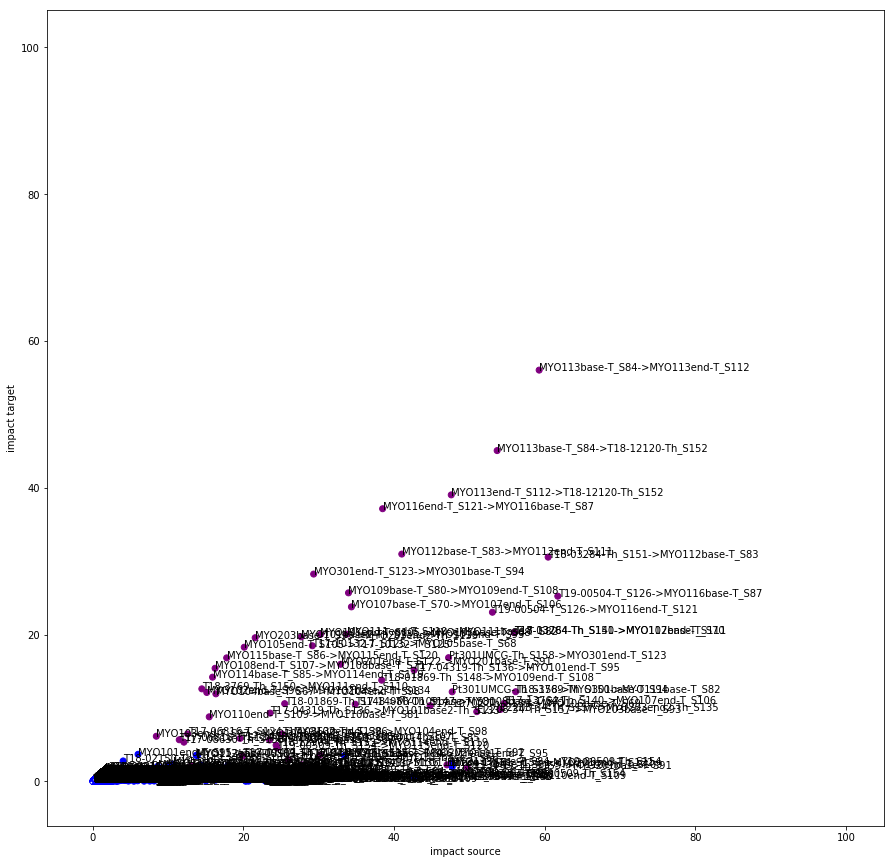

In [23]:
plotfile = outfile.replace(".xlsx", "-all.pdf")
makeScatter(df_shared["impact_source"], df_shared["impact_target"], df_shared['txt'], df_shared['color'], "impact source", "impact target", plotfile)

In [24]:
# Only show things that are different
df_shared_filter = df_shared.copy()
df_shared_filter = df_shared_filter[df_shared_filter["Same patient"] == "different"]
cols = ["source", "target", "impact_source", "impact_target", "Same patient", "txt", "color"]
df_shared_filter = df_shared_filter[cols]
df_shared_filter = df_shared_filter.reset_index()
df_shared_filter.head()

,index,source,target,impact_source,impact_target,Same patient,txt,color
0,48,MYO101end-T_S95,T17-07401-Th_S137,6.025370,3.691275,different,MYO101end-T_S95->T17-07401-Th_S137,blue
1,50,MYO112end-T_S111,T17-04319-Th_S136,13.747481,3.555556,different,MYO112end-T_S111->T17-04319-Th_S136,blue
2,51,MYO112base-T_S83,T17-07401-Th_S137,13.900415,3.523490,different,MYO112base-T_S83->T17-07401-Th_S137,blue
3,52,MYO113base-T_S84,MYO101end-T_S95,33.410034,3.509514,different,MYO113base-T_S84->MYO101end-T_S95,blue
4,55,T18-02150-Th_S149,MYO111base-T_S82,4.046243,2.786404,different,T18-02150-Th_S149->MYO111base-T_S82,blue


Wrote run46-TRB-HUMAN-shared-clones-different-ids.pdf to disk


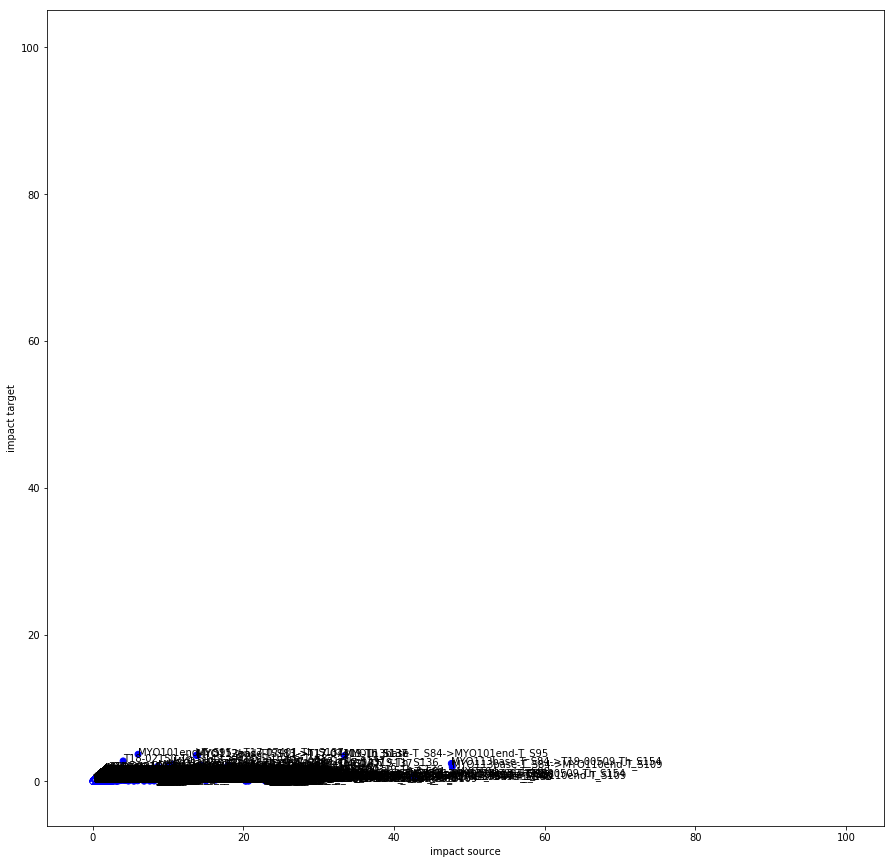

In [25]:
plotfile = outfile.replace(".xlsx", "-different-ids.pdf")
makeScatter(df_shared_filter["impact_source"], df_shared_filter["impact_target"], df_shared_filter['txt'], df_shared_filter['color'], "impact source", "impact target", plotfile)

## Calculate common/public clones

In [26]:
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,MYO101,MYO101base2-Th_S133,CAGGDSTGELFFG,2,1279,0.156372
1,MYO101,MYO101base2-Th_S133,CAHFYRGRVQPQHFG,2,1279,0.156372
2,MYO101,MYO101base2-Th_S133,CAIMKDRANTEAFFG,1,1279,0.078186
3,MYO101,MYO101base2-Th_S133,CAIPGESNTGELFFG,1,1279,0.078186
4,MYO101,MYO101base2-Th_S133,CAIRLVTRASNEKLFFG,1,1279,0.078186


In [27]:
concat = lambda x: ", ".join(list(set(x)))
df_clone_occurrence = df.groupby('cdr3pep').agg({'Patient': [pd.Series.nunique, concat], 'Sample': [pd.Series.nunique, concat]})

In [28]:
df_clone_occurrence = df_clone_occurrence.rename(columns={'<lambda>': 'names'})
df_clone_occurrence.head()

Patient          Sample                    
                   nunique   names nunique               names
cdr3pep                                                       
CAAAASGRAQRTGELFFG       1  MYO103       1    MYO103base-T_S66
CAAAASGSEQFFG            1  MYO114       1    MYO114end-T_S119
CAAAEGPTYEQYFG           1  MYO203       1  MYO203end2-Th_S135
CAAAGGAGSNQPQHFG         1  MYO114       1   T18-12904-Th_S153
CAAAGGYNEQFFG            1  MYO203       1  MYO203end2-Th_S135

In [29]:
# Get percentage columns for each sample
df_pivot = df.pivot_table(index='cdr3pep', columns=['Patient','Sample'], values='perc', aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.head()

Patient             cdr3pep              MYO101                  \
Sample                      MYO101base2-Th_S133 MYO101end-T_S95   
0        CAAAASGRAQRTGELFFG                 NaN             NaN   
1             CAAAASGSEQFFG                 NaN             NaN   
2            CAAAEGPTYEQYFG                 NaN             NaN   
3          CAAAGGAGSNQPQHFG                 NaN             NaN   
4             CAAAGGYNEQFFG                 NaN             NaN   

Patient                                MYO102                  \
Sample  T17-04319-Th_S136 MYO102base2-Th_S134 MYO102end-T_S96   
0                     NaN                 NaN             NaN   
1                     NaN                 NaN             NaN   
2                     NaN                 NaN             NaN   
3                     NaN                 NaN             NaN   
4                     NaN                 NaN             NaN   

Patient                            MYO103                                    \
Sample  T17-06816-T_S124 MYO103base-T_S66 MYO103end-T_S97 T17-07401-Th_S137   
0                    NaN         0.005313             NaN               NaN   
1                    NaN              NaN             NaN               NaN   
2                    NaN              NaN             NaN               NaN   
3                    NaN              NaN             NaN               NaN   
4                    NaN              NaN             NaN               NaN   

Patient  ...           MYO201                            MYO202  \
Sample   ... MYO201base-T_S91 MYO201end-T_S122 E2134-39-Th_S156   
0        ...              NaN              NaN              NaN   
1        ...              NaN              NaN              NaN   
2        ...              NaN              NaN              NaN   
3        ...              NaN              NaN              NaN   
4        ...              NaN              NaN              NaN   

Patient                            MYO203                                      \
Sample  MYO202base-T_S92 E2208-34-Th_S157 MYO203base-T_S93 MYO203end2-Th_S135   
0                    NaN              NaN              NaN                NaN   
1                    NaN              NaN              NaN                NaN   
2                    NaN              NaN              NaN           0.004449   
3                    NaN              NaN              NaN                NaN   
4                    NaN              NaN              NaN           0.004449   

Patient           MYO301                                     
Sample  MYO301base-T_S94 MYO301end-T_S123 Pt301UMCG-Th_S158  
0                    NaN              NaN               NaN  
1                    NaN              NaN               NaN  
2                    NaN              NaN               NaN  
3                    NaN              NaN               NaN  
4                    NaN              NaN               NaN  

[5 rows x 59 columns]

In [30]:
df_clone_occurrence = pd.merge(df_clone_occurrence, df_pivot, on='cdr3pep')
df_clone_occurrence = df_clone_occurrence.sort_values(by=[('Patient','nunique'), ('Sample','nunique')], ascending=False)
df_clone_occurrence = df_clone_occurrence.reset_index()
df_clone_occurrence.head()

/home/barbera/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


index         cdr3pep Patient  \
                          nunique   
0   36974          CASSFG      20   
1   57948         CASSLFG      18   
2   91609  CASSPPSTDTQYFG      17   
3  195839           CSVFG      17   
4   80634         CASSPFG      16   

                                                      Sample  \
                                               names nunique   
0  MYO113, MYO101, MYO105, MYO109, MYO114, MYO111...      48   
1  MYO113, MYO101, MYO105, MYO109, MYO114, MYO112...      23   
2  MYO101, MYO105, MYO109, MYO114, MYO111, MYO112...      23   
3  MYO113, MYO101, MYO109, MYO114, MYO111, MYO112...      22   
4  MYO101, MYO105, MYO109, MYO114, MYO112, MYO203...      22   

                                                                  MYO101  \
                                               names MYO101base2-Th_S133   
0  MYO202base-T_S92, MYO111base-T_S82, MYO112end-...                 NaN   
1  MYO202base-T_S92, MYO112base-T_S83, MYO113end-...                 NaN   
2  T17-13764-Th_S140, MYO202base-T_S92, MYO111bas...                 NaN   
3  MYO111base-T_S82, MYO112end-T_S111, MYO113end-...            0.156372   
4  MYO202base-T_S92, MYO112base-T_S83, MYO116end-...                 NaN   

                                                 MYO102  ...           MYO201  \
  MYO101end-T_S95 T17-04319-Th_S136 MYO102base2-Th_S134  ... MYO201base-T_S91   
0        0.105708               NaN            0.250475  ...         0.058111   
1        0.010571               NaN            0.008637  ...         0.009685   
2        0.042283               NaN                 NaN  ...              NaN   
3        0.475687          0.444444            0.025911  ...              NaN   
4        0.010571          0.444444            0.008637  ...              NaN   

                             MYO202                            MYO203  \
  MYO201end-T_S122 E2134-39-Th_S156 MYO202base-T_S92 E2208-34-Th_S157   
0         0.123457              NaN         0.192616         0.337909   
1              NaN              NaN         0.016051              NaN   
2         0.024691              NaN         0.024077              NaN   
3         0.049383              NaN              NaN              NaN   
4              NaN              NaN         0.016051              NaN   

                                                MYO301                   \
  MYO203base-T_S93 MYO203end2-Th_S135 MYO301base-T_S94 MYO301end-T_S123   
0         0.077241           0.169069         0.139233         0.076214   
1         0.004544                NaN         0.015470         0.060971   
2         0.009087           0.008898              NaN         0.007621   
3              NaN           0.004449              NaN              NaN   
4         0.031805           0.004449              NaN         0.007621   

                     
  Pt301UMCG-Th_S158  
0          0.719424  
1               NaN  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 64 columns]

In [31]:
# Only keep entries that are in 2 or more Samples
print("All cdr3's:", len(df_clone_occurrence))
df_clone_occurrence = df_clone_occurrence[df_clone_occurrence[('Sample','nunique')] > 1]
print("cdr3's in > 1 sample:", len(df_clone_occurrence))

All cdr3's: 220950
cdr3's in > 1 sample: 16973


In [32]:
occurrence_file = outfile.replace(".xlsx", "-occurrence.xlsx")
df_clone_occurrence.to_excel(occurrence_file)
print("Wrote", occurrence_file, "to disk")

Wrote run46-TRB-HUMAN-shared-clones-occurrence.xlsx to disk
